In [2]:
import numpy as np
import xarray as xr
import os as os
import netCDF4 as nc
import h5netcdf as h5netcdf
import matplotlib.pyplot as plt
import geopandas as gpd
import rioxarray as rioxarray
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,5)
import xmip as xmip
import intake as intake
import intake_esm as intake_esm
import rasterio
from affine import Affine
import nc_time_axis
import cftime
from shapely.geometry import mapping, Polygon
import datetime
import warnings
from datetime import datetime, timedelta
import regionmask
import cartopy.crs as crss
import regions
from osgeo import gdal,osr,ogr

C:\Users\mferriter\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [85]:
#open the netcdf file
ds = xr.open_dataset("C:\\Users\\mferriter\\Desktop\\Burned\\burnarea_1km.nc")
ss = xr.open_dataset("C:\\Users\\mferriter\\Desktop\\Burned\\nlcd_frac_2019.nc")
#open the study site shapefile
gdf = gpd.read_file("C:\\Users\\mferriter\\Desktop\\Geog280\\Data\\SouthCoast2.shp", crs="epsg:5070")
ds.rio.write_crs("EPSG:5070", inplace=True)

<xarray.Dataset>
Dimensions:      (X: 1855, Y: 2489, time: 468)
Coordinates:
  * X            (X) float64 -2.355e+06 -2.354e+06 ... -5.018e+05 -5.008e+05
  * Y            (Y) float64 3.172e+06 3.171e+06 3.17e+06 ... 6.85e+05 6.84e+05
  * time         (time) datetime64[ns] 1984-01-15 1984-02-15 ... 2022-12-15
    spatial_ref  int32 0
Data variables:
    burnarea     (time, Y, X) float32 ...

In [86]:
ds = ds.burnarea.squeeze().transpose('time', 'Y', 'X')
ds.coords["x"] = ds.X
ds.coords["y"] = ds.Y
ds.coords["time"] = ds.time

In [87]:
ds.rio.set_spatial_dims(x_dim="X", y_dim="Y", inplace=True)

<xarray.DataArray 'burnarea' (time: 468, Y: 2489, X: 1855)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       ...,

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]], dtype=float32)
Coordinates:
  * X            (X) float64 -2.355e+06 -2.354e+06 ... -5.018e+05 -5.008e+05
  * Y            (Y) float64 3.172e+06 3.171e+06 3.17e+06 ... 6.85e+05 6.84e+05
  * time         (time) datetime64[ns] 1984-01-15 1984-02-15 ... 2022-12-15
    spatial_ref  int32 0
    x            (X) float64 -2.355e+06 -2.354e+06 ... -5.018e+05 -5.008e+05
    y            (Y) float64 3.172e+06 3.171e+06 3.17e+06 ... 6.85e+05 6.84e+05
Attributes:
    long_name:  monthly burned area
    units:      square km

In [88]:
clipped = ds.rio.clip(gdf.geometry.apply(mapping), gdf.crs, all_touched=True)

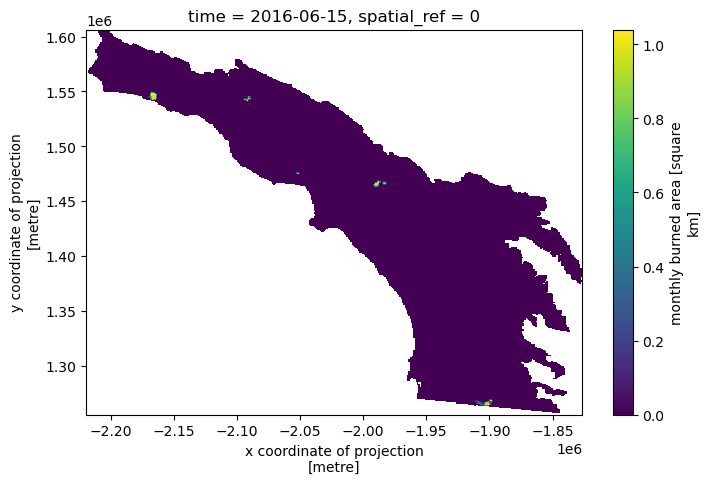

In [89]:
clipped.sel(time='2016-06').squeeze().plot()

<AxesSubplot:>

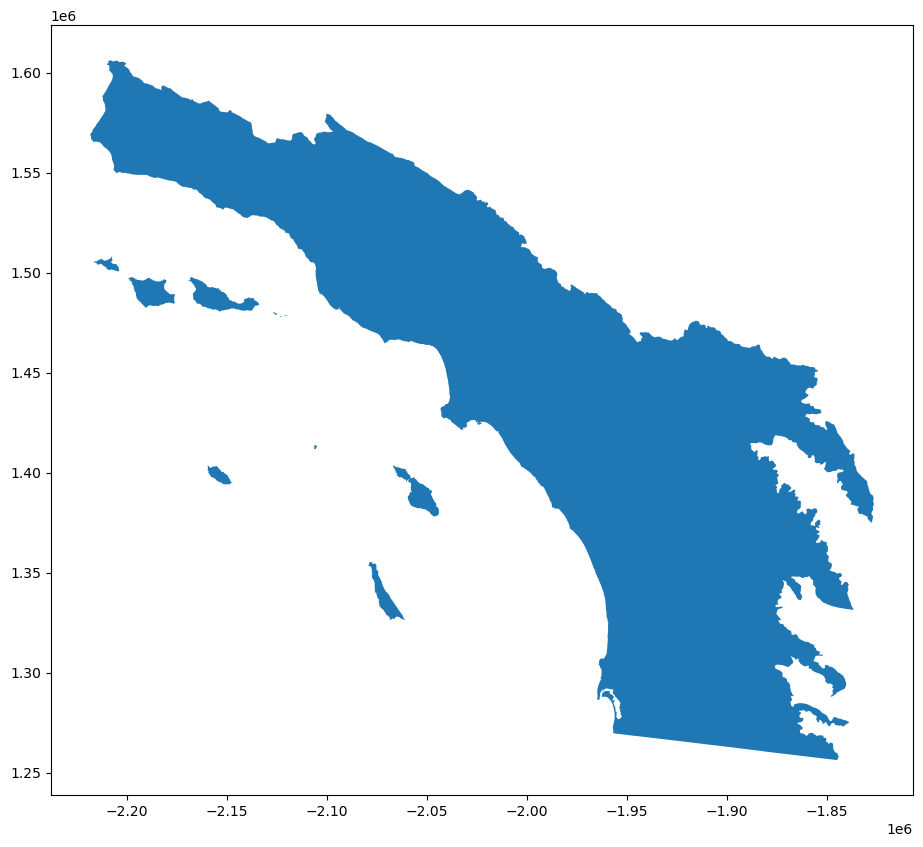

In [90]:
fig, ax = plt.subplots(figsize=(16,10))
gdf.plot(ax=ax,)

In [91]:
res = clipped.resample(time = '1Y').sum()    

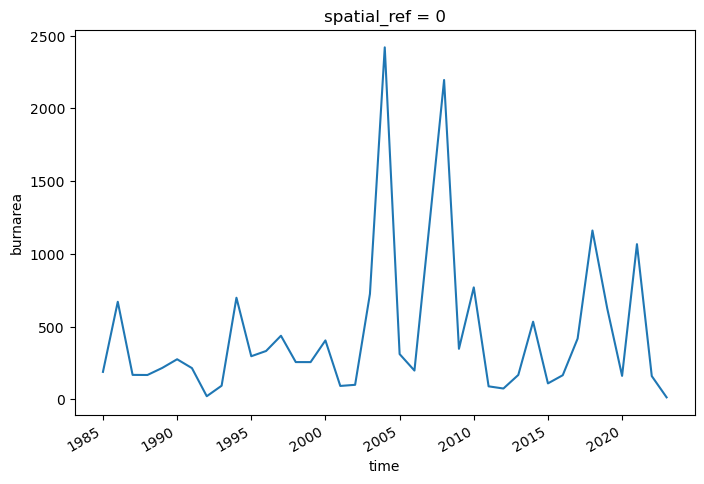

In [92]:
res.groupby('time').sum(...).plot()